# Format WiTracing Result

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D 
import seaborn as sns
import pandas as pd

import IPython
from IPython.display import clear_output

In [31]:
CSV_FILE = "../data/preprocessed_data.csv"
OUT_CSV_FILE = '../data/data.csv"'

In [32]:
def preprocess(df):
    df['tx'] = df['tx'].str.lower()
    df['x'] = df['x'].round(2)
    df['y'] = df['y'].round(2)
    df['z'] = df['z'].round(2)
    return df

df = pd.read_csv(CSV_FILE)
df = preprocess(df)
df

,tx,x,y,z,rssi,timestamp
0,tx9,-577.71,681.59,694.18,-67,1668916617983
1,tx10,-577.71,681.59,694.18,-70,1668916617983
2,tx11,-577.71,681.59,694.18,-65,1668916617983
3,tx0,-577.71,681.59,694.18,-61,1668916617983
4,tx6,-577.71,681.59,694.18,-65,1668916617983
...,...,...,...,...,...,...
523595,tx46,-5.87,-837.70,691.66,-70,1668917659326
523596,tx48,-5.87,-837.70,691.66,-68,1668917659326
523597,tx49,-5.87,-837.70,691.66,-72,1668917659326
523598,tx42,-5.87,-837.70,691.66,-70,1668917659326


### X-Y Coordinates for All Measurement

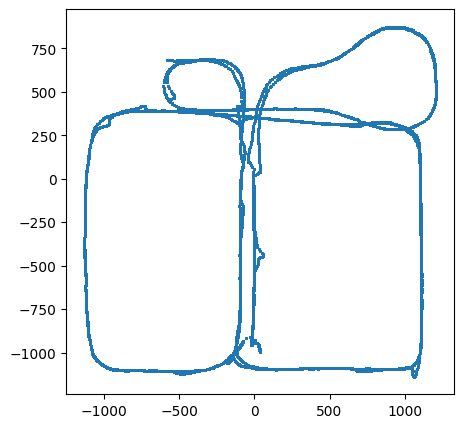

In [29]:
s = slice(0,100000)
fig = plt.figure(figsize=(5,5))
plt.scatter(df.x[s], df.y[s], s=1)
plt.show()

### X-Y Coordinates for Single TX

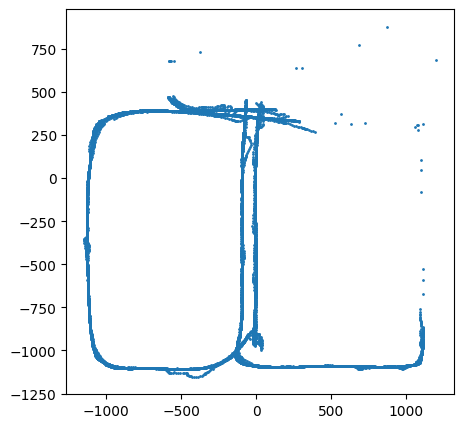

In [5]:
tx_df = df[df.tx == 'tx4']
fig = plt.figure(figsize=(5,5))
plt.scatter(tx_df.x, tx_df.y, s=1)
plt.show()

In [6]:
len(df.tx.unique())

50

### Format Raw Data

In [7]:
def formating(df):
    prev_xyz = [0,0,0]
    tx_num = len(df.tx.unique())
    columns = ['t', 'x', 'y', 'z'] + list(df.tx.unique())
    prep_df = pd.DataFrame(columns = columns)
    
    # although using concat method can significantly improve the the efficiency in this part, but we need to process one-by-one in the wi tracing system
    total = len(df)
    for num, row in df.iterrows():
        xyz = [row['x'], row['y'], row['z']]
        # if coordinate change
        index = len(prep_df.index)
        if prev_xyz != xyz:
            prep_df.loc[index] = [row['timestamp'], xyz[0], xyz[1], xyz[2]] + [-255] * tx_num
            prev_xyz = xyz
            prep_df.at[index, row['tx']] = row['rssi']
        else:
            prep_df.at[index - 1, row['tx']] = row['rssi']
        clear_output(wait=True)
        progress = round(num / total * 100, 2)
        print(f'Progress: { progress:.2f} %')
    return prep_df

In [8]:
prep_df = formating(df)
display(prep_df)

Progress: 100.00 %


,t,x,y,z,tx9,tx10,tx11,tx0,tx6,tx13,...,tx41,tx43,tx44,tx45,tx46,tx47,tx48,tx49,tx20,tx40
0,1.668869e+12,-577.71,681.59,694.18,-63.0,-66.0,-62.0,-62.0,-67.0,-61.0,...,-255.0,-255.0,-255.0,-255.0,-255.0,-255.0,-255.0,-255.0,-255.0,-255.0
1,1.668869e+12,-576.99,682.59,692.90,-63.0,-66.0,-63.0,-62.0,-67.0,-61.0,...,-255.0,-255.0,-255.0,-255.0,-255.0,-255.0,-255.0,-255.0,-255.0,-255.0
2,1.668869e+12,-572.47,682.85,693.04,-63.0,-66.0,-63.0,-62.0,-65.0,-61.0,...,-255.0,-255.0,-255.0,-255.0,-255.0,-255.0,-255.0,-255.0,-255.0,-255.0
3,1.668869e+12,-564.90,682.71,694.11,-63.0,-66.0,-63.0,-62.0,-65.0,-61.0,...,-255.0,-255.0,-255.0,-255.0,-255.0,-255.0,-255.0,-255.0,-255.0,-255.0
4,1.668869e+12,-549.59,681.62,697.36,-63.0,-66.0,-62.0,-62.0,-66.0,-60.0,...,-255.0,-255.0,-255.0,-255.0,-255.0,-255.0,-255.0,-255.0,-255.0,-255.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15688,1.668870e+12,-907.76,363.09,693.58,-68.0,-70.0,-255.0,-255.0,-255.0,-255.0,...,-255.0,-255.0,-255.0,-255.0,-255.0,-255.0,-255.0,-255.0,-255.0,-255.0
15689,1.668870e+12,-914.55,360.68,692.14,-68.0,-69.0,-67.0,-255.0,-255.0,-255.0,...,-255.0,-255.0,-255.0,-255.0,-255.0,-255.0,-255.0,-255.0,-255.0,-255.0
15690,1.668870e+12,-923.99,357.04,692.83,-68.0,-69.0,-67.0,-255.0,-255.0,-255.0,...,-255.0,-255.0,-255.0,-255.0,-255.0,-255.0,-255.0,-255.0,-255.0,-255.0
15691,1.668870e+12,-935.21,352.13,694.69,-68.0,-69.0,-67.0,-255.0,-255.0,-255.0,...,-255.0,-255.0,-255.0,-255.0,-255.0,-255.0,-255.0,-255.0,-255.0,-255.0


In [10]:
prep_df.to_csv('../data/data.csv', index=False)

In [3]:
plt.plot(prep_df[['x', 'y']])

NameError: name 'prep_df' is not defined